# Análisis exploratorio de datos

## Recolección y Exploración de Datos
1. Obtener el dataset completo
2. Realizar análisis exploratorio inicial:
   - Dimensiones del dataset
   - Tipos de datos
   - Estadísticas descriptivas básicas
   - Distribución de variables
   - Correlaciones
3. Verificar la calidad de los datos:
   - Identificar valores faltantes
   - Detectar inconsistencias
   - Verificar el balance de clases (para clasificación)
   - Identificar posibles errores en los datos

### Librerías

In [12]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats

# Estadística 
import scipy

### Datos

In [3]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\ML_laptops\data\raw_data\train.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.0
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.0
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.0
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.0


## Primera observación

In [4]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.00
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16GB,1TB SSD,Intel Iris Graphics 540,Windows 10,1.3kg,1799.00
909,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,1537.39
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg,989.00
911,531,Dell,Inspiron 5770,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.8kg,889.00


In [8]:
df.shape

(912, 13)

In [5]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [10]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000
mean,660.868421,14.957018,1109.652752
std,382.437227,1.428753,705.906280
min,1.000000,10.100000,191.900000
25%,328.250000,14.000000,572.750000
50%,658.000000,15.600000,949.000000
75%,994.250000,15.600000,1468.000000
max,1320.000000,18.400000,5499.000000


In [9]:
df[df.duplicated(keep = False)] 

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


Observaciones
- El conjunto de datos se compone de 13 columnas y 912 filas
- Ocupa una memoria de 92.8+ KB
- No hay datos nulos
- No hay valores duplicados
- La mayoría son del tipo 'object'
- Solo hay 3 variables numéricas (laptop_ID, Inches, Price_euros)

In [11]:
companies = df.groupby('Company').size()
print(companies)

Company
Acer          73
Apple         15
Asus         103
Chuwi          3
Dell         211
Fujitsu        2
Google         3
HP           197
Huawei         2
LG             2
Lenovo       214
MSI           30
Mediacom       5
Microsoft      4
Razer          6
Samsung        6
Toshiba       32
Vero           1
Xiaomi         3
dtype: int64


In [14]:
# Crear un DataFrame vacío
summary_df = pd.DataFrame(columns=[
    'Nombre de la variable', 
    'Tipo de dato', 
    'Tipo de variable', 
    'Cardinalidad', 
    'Distribución', 
    'Valores faltantes (cantidad)', 
    'Valores faltantes (%)', 
    'Outliers (cantidad)', 
    'Outliers (%)', 
    'Rango de valores', 
    'Moda', 
    'Media', 
    'Mediana', 
    'Asimetría', 
    'Curtosis', 
    'Resultados de pruebas de normalidad'
])

def summarize_variable(col):
    data_type = col.dtype
    variable_type = 'numérica' if np.issubdtype(data_type, np.number) else 'categórica'
    cardinality = col.nunique()
    normality_test_result = 'N/A'

    if np.issubdtype(data_type, np.number):
        # Test de K-S
        d_statistic, p_value = stats.kstest(col.dropna(), 'norm', args=(col.mean(), col.std()))
        normality_test_result = 'Normal' if p_value > 0.05 else 'No normal'
        distribution = 'Gaussiana' if normality_test_result == 'Normal' else 'No gaussiana'
    else:
        distribution = 'Categórica'
    
    # Valores faltantes
    missing_count = col.isnull().sum()
    missing_percentage = missing_count / len(col) * 100
    
    # Outliers
    if np.issubdtype(data_type, np.number):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = col[(col < lower_bound) | (col > upper_bound)]
        outliers_count = outliers.count()
        outliers_percentage = outliers_count / len(col) * 100
    else:
        outliers_count = 0
        outliers_percentage = 0

    value_range = f"{col.min()} - {col.max()}" if np.issubdtype(data_type, np.number) else 'N/A'
    
    mode = col.mode()[0] if variable_type == 'categórica' else col.mode().values[0]
    mean = col.mean() if variable_type == 'numérica' else 'N/A'
    median = col.median() if variable_type == 'numérica' else 'N/A'
    skewness = col.skew() if variable_type == 'numérica' else 'N/A'
    kurtosis = col.kurtosis() if variable_type == 'numérica' else 'N/A'

    summary_df.loc[len(summary_df)] = [
        col.name, 
        data_type, 
        variable_type, 
        cardinality, 
        distribution, 
        missing_count, 
        missing_percentage, 
        outliers_count, 
        outliers_percentage, 
        value_range, 
        mode, 
        mean, 
        median, 
        skewness, 
        kurtosis, 
        normality_test_result
    ]

for column in df.columns:
    summarize_variable(df[column])

summary_df.set_index('Nombre de la variable', inplace=True)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el truncado de filas

import IPython.display as display
display.display(summary_df)


,Tipo de dato,Tipo de variable,Cardinalidad,Distribución,Valores faltantes (cantidad),Valores faltantes (%),Outliers (cantidad),Outliers (%),Rango de valores,Moda,Media,Mediana,Asimetría,Curtosis,Resultados de pruebas de normalidad
Nombre de la variable,,,,,,,,,,,,,,,
laptop_ID,int64,numérica,912,No gaussiana,0,0.0,0,0.000000,1 - 1320,1,660.868421,658.0,-0.002601,-1.19851,No normal
Company,object,categórica,19,Categórica,0,0.0,0,0.000000,N/A,Lenovo,N/A,N/A,N/A,N/A,N/A
Product,object,categórica,475,Categórica,0,0.0,0,0.000000,N/A,XPS 13,N/A,N/A,N/A,N/A,N/A
TypeName,object,categórica,6,Categórica,0,0.0,0,0.000000,N/A,Notebook,N/A,N/A,N/A,N/A,N/A
Inches,float64,numérica,18,No gaussiana,0,0.0,32,3.508772,10.1 - 18.4,15.6,14.957018,15.6,-0.468212,-0.037448,No normal
ScreenResolution,object,categórica,38,Categórica,0,0.0,0,0.000000,N/A,Full HD 1920x1080,N/A,N/A,N/A,N/A,N/A
Cpu,object,categórica,101,Categórica,0,0.0,0,0.000000,N/A,Intel Core i5 7200U 2.5GHz,N/A,N/A,N/A,N/A,N/A
Ram,object,categórica,9,Categórica,0,0.0,0,0.000000,N/A,8GB,N/A,N/A,N/A,N/A,N/A
Memory,object,categórica,35,Categórica,0,0.0,0,0.000000,N/A,256GB SSD,N/A,N/A,N/A,N/A,N/A


## Análisis exploratorio

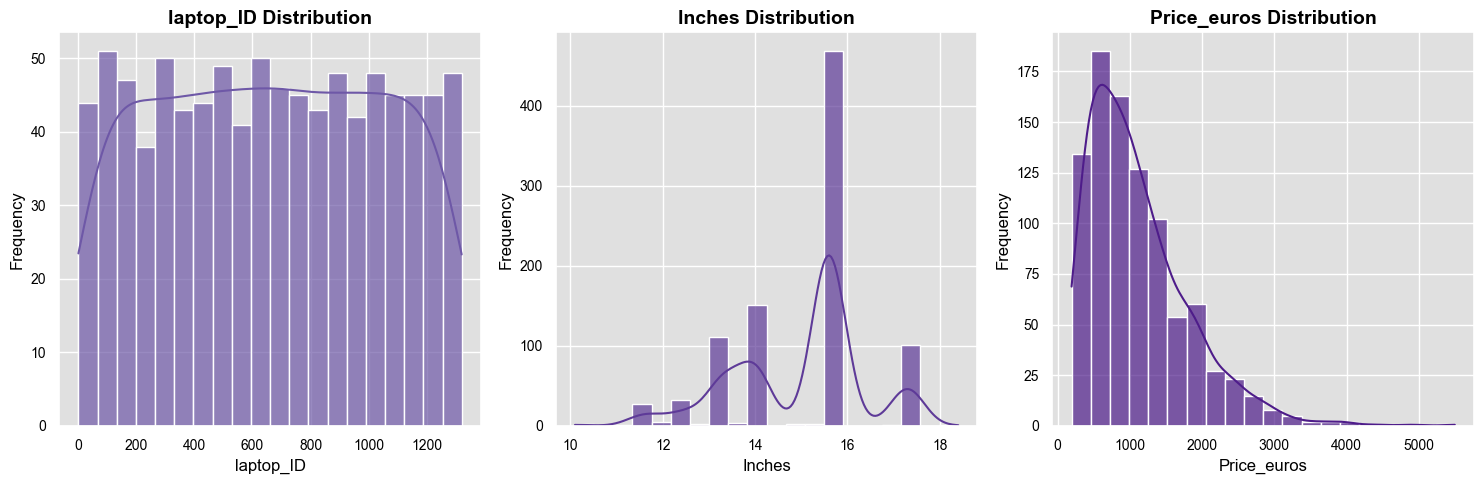

In [16]:
import warnings
warnings.filterwarnings("ignore")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns # Columnas numéricas
numerical_columns = [col for col in numerical_columns if col.lower() != 'id'] # Excluimos el id

sns.set(style="darkgrid")

# Tamaño de las figuras
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

# Tamaño subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
# Color (morados en este caso)
colors = sns.color_palette("Purples", num_cols)

# Para que los 3 primeros colores sean más oscuros:
dark_colors = sns.color_palette("Purples", 10)[7:10]  
colors[:3] = dark_colors  # Asignamos colores más oscuros a las 3 primeras columnas

# Distribución de las columnas numéricas para el plot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  # Gris claro para el fondo

# Elimina subplots vacíos si el numero de columnas no es multiplo de 3 
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Ajusta los layout 
plt.tight_layout()
plt.show()

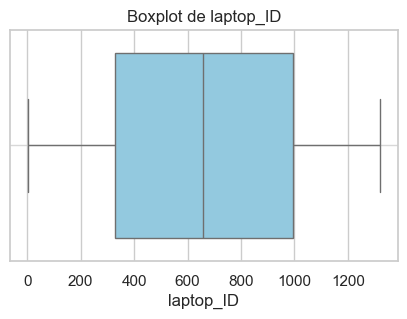

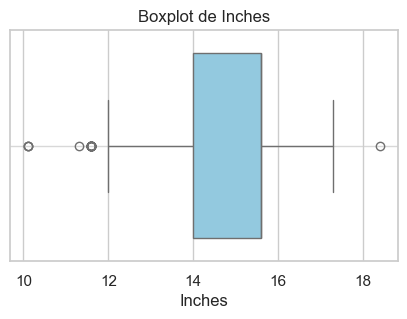

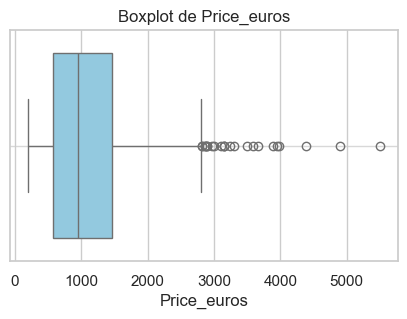

In [21]:
# Boxplots (outlayers)
sns.set(style="whitegrid")

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [24]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.0
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.0


Frecuencias absolutas para Company:
Company
Lenovo       214
Dell         211
HP           197
Asus         103
Acer          73
Toshiba       32
MSI           30
Apple         15
Samsung        6
Razer          6
Mediacom       5
Microsoft      4
Xiaomi         3
Chuwi          3
Google         3
LG             2
Fujitsu        2
Huawei         2
Vero           1
Name: count, dtype: int64



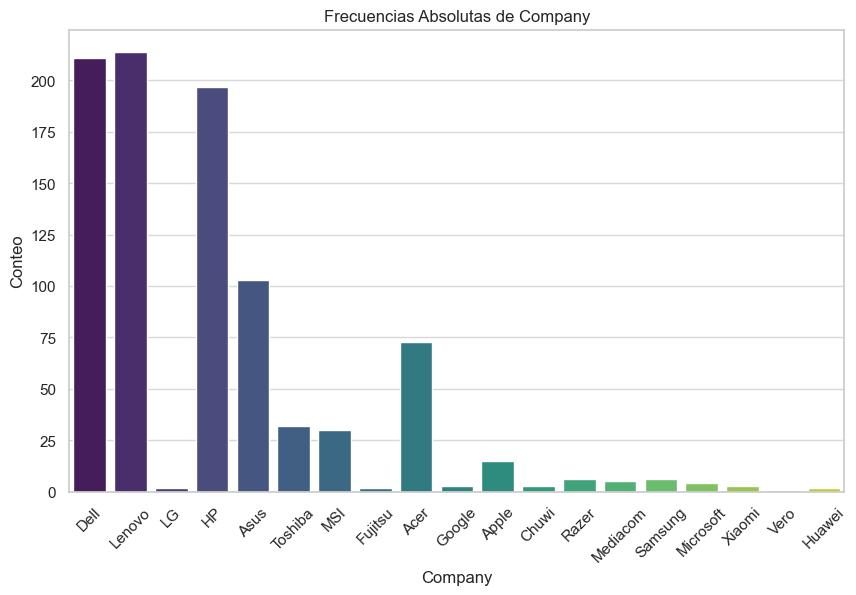

Frecuencias absolutas para Product:
Product
XPS 13                                        21
Inspiron 3567                                 20
Legion Y520-15IKBN                            15
Vostro 3568                                   14
250 G6                                        13
                                              ..
V110-15ISK (i5-6200U/4GB/500GB/W10)            1
Vivobook X541UV-DM1217T                        1
15-bw009nv (A12-9720P/6GB/1TB/Radeon           1
Portege A30-C-1CZ                              1
R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10)     1
Name: count, Length: 475, dtype: int64



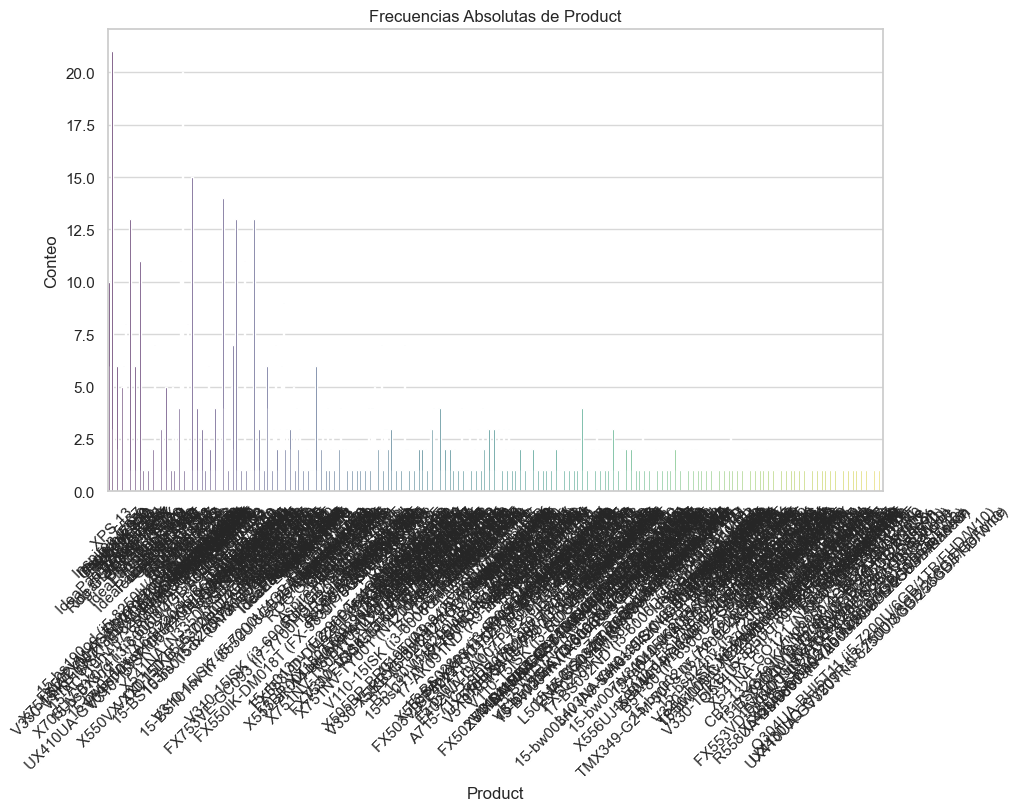

Frecuencias absolutas para TypeName:
TypeName
Notebook              522
Ultrabook             140
Gaming                130
2 in 1 Convertible     83
Workstation            19
Netbook                18
Name: count, dtype: int64



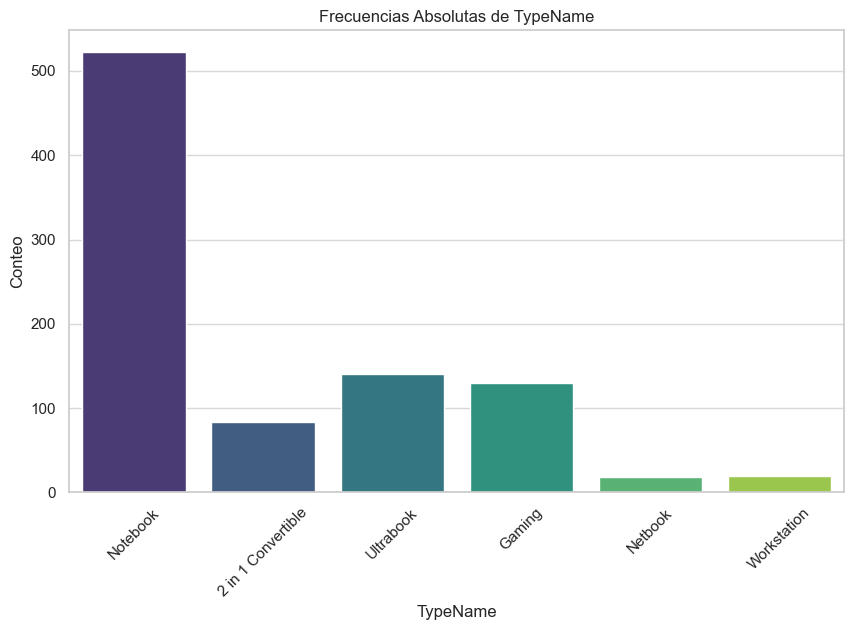

Frecuencias absolutas para ScreenResolution:
ScreenResolution
Full HD 1920x1080                                350
1366x768                                         204
IPS Panel Full HD 1920x1080                      158
IPS Panel Full HD / Touchscreen 1920x1080         36
Full HD / Touchscreen 1920x1080                   28
1600x900                                          16
Touchscreen 1366x768                              14
Quad HD+ / Touchscreen 3200x1800                  10
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
IPS Panel 4K Ultra HD 3840x2160                    8
4K Ultra HD / Touchscreen 3840x2160                7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel 1366x768                                 5
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Retina Display 2560x1600                 4
1440x900                             

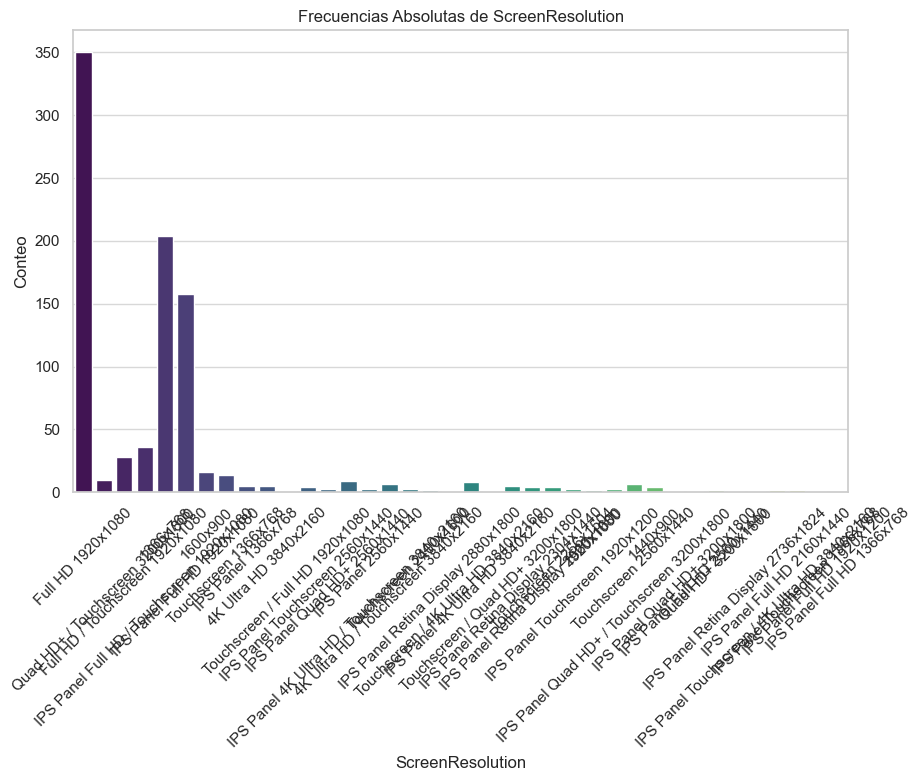

Frecuencias absolutas para Cpu:
Cpu
Intel Core i5 7200U 2.5GHz     134
Intel Core i7 7700HQ 2.8GHz     98
Intel Core i7 7500U 2.7GHz      95
Intel Core i5 8250U 1.6GHz      54
Intel Core i3 6006U 2GHz        46
                              ... 
Intel Core i5 1.3GHz             1
Intel Core i5 6440HQ 2.6GHz      1
Intel Core i7 7500U 2.5GHz       1
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 6560U 2.2GHz       1
Name: count, Length: 101, dtype: int64



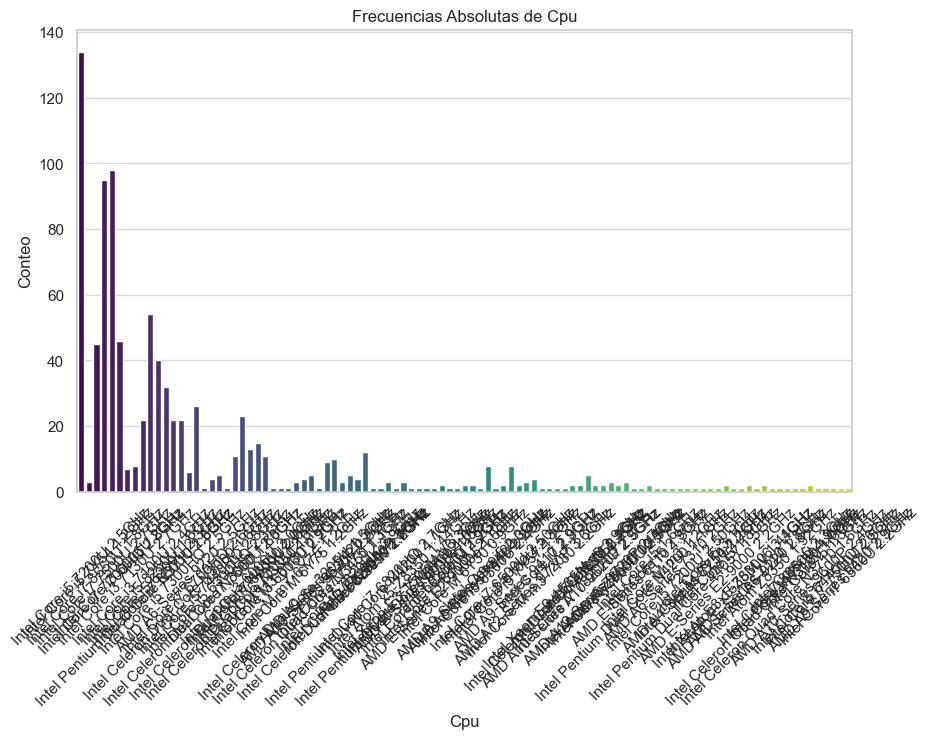

Frecuencias absolutas para Ram:
Ram
8GB     431
4GB     269
16GB    133
6GB      28
2GB      18
12GB     17
32GB     13
24GB      2
64GB      1
Name: count, dtype: int64



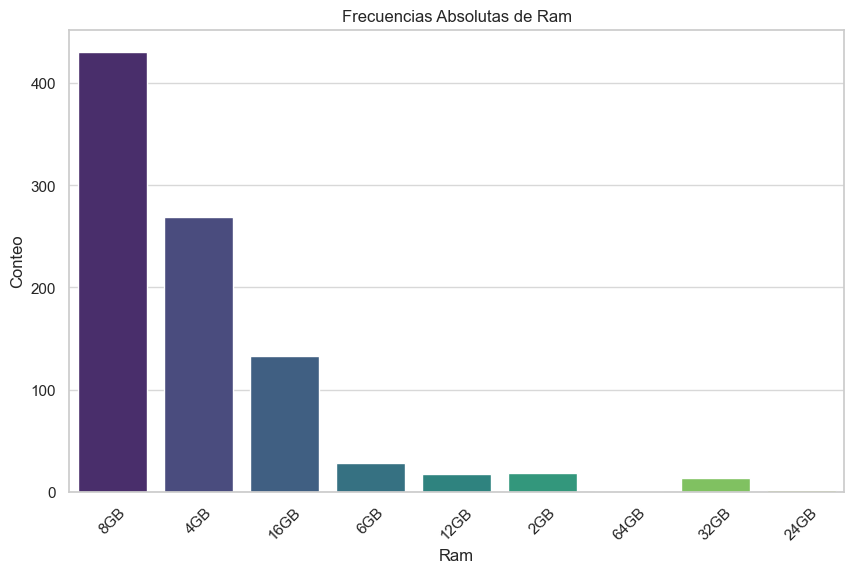

Frecuencias absolutas para Memory:
Memory
256GB SSD                        289
1TB HDD                          155
500GB HDD                        100
512GB SSD                         87
128GB SSD +  1TB HDD              56
128GB SSD                         52
256GB SSD +  1TB HDD              45
32GB Flash Storage                29
2TB HDD                           12
1TB SSD                           11
64GB Flash Storage                11
1.0TB Hybrid                       8
512GB SSD +  1TB HDD               8
256GB Flash Storage                7
256GB SSD +  2TB HDD               5
16GB Flash Storage                 5
32GB SSD                           4
128GB Flash Storage                4
16GB SSD                           3
180GB SSD                          3
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
8GB SSD                            1
240GB SSD                          1
512GB Flash Storage              

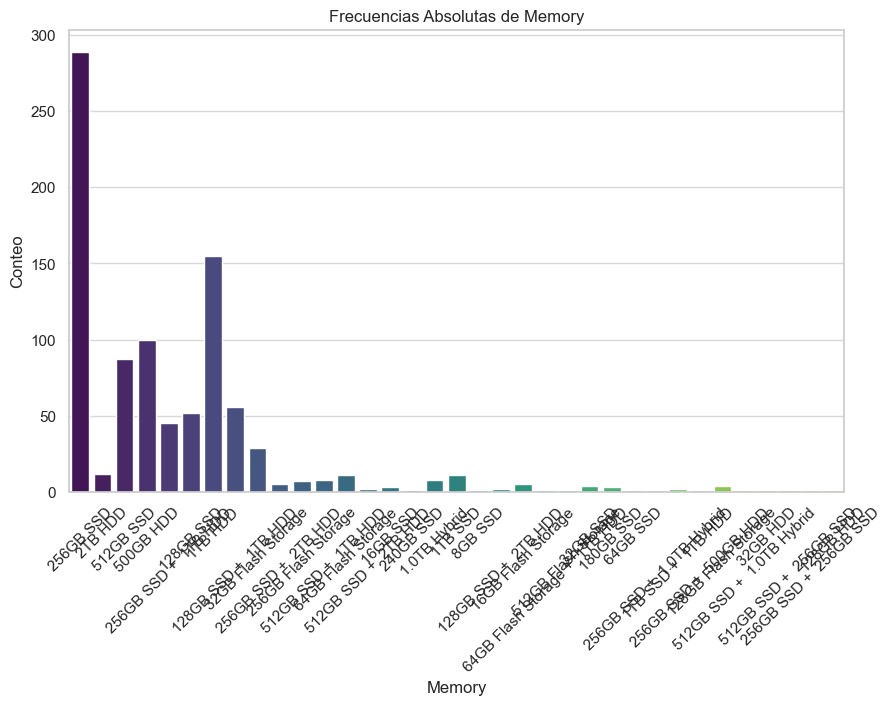

Frecuencias absolutas para Gpu:
Gpu
Intel HD Graphics 620       202
Intel HD Graphics 520       129
Intel UHD Graphics 620       47
Nvidia GeForce GTX 1050      45
AMD Radeon 530               33
                           ... 
Intel HD Graphics 530         1
AMD Radeon R5 430             1
AMD FirePro W5130M            1
Nvidia GeForce GTX 940M       1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 91, dtype: int64



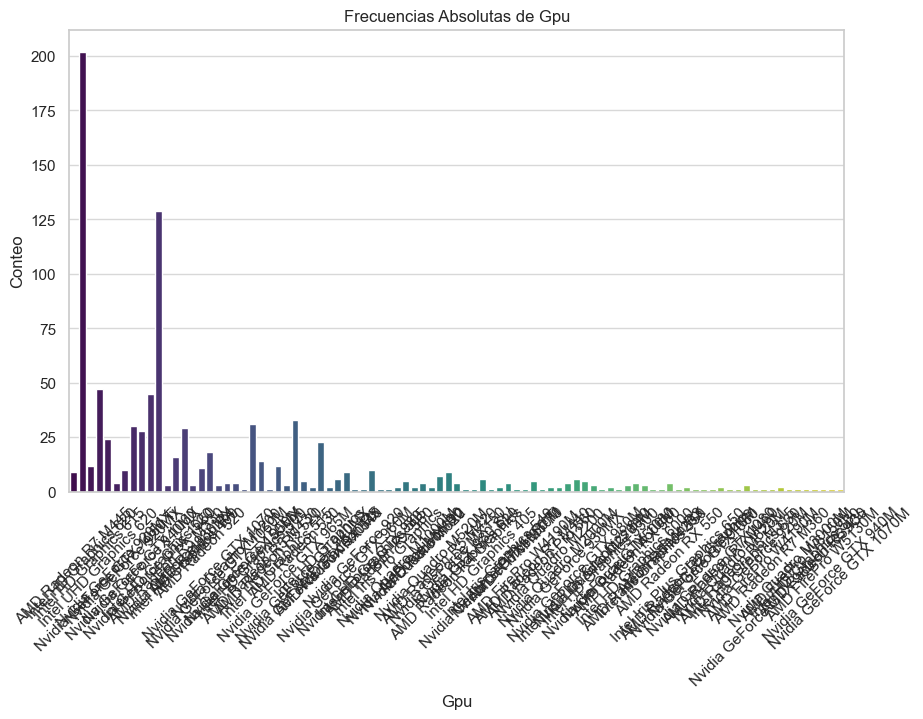

Frecuencias absolutas para OpSys:
OpSys
Windows 10      755
No OS            48
Linux            40
Windows 7        28
Chrome OS        20
macOS             9
Mac OS X          6
Windows 10 S      5
Android           1
Name: count, dtype: int64



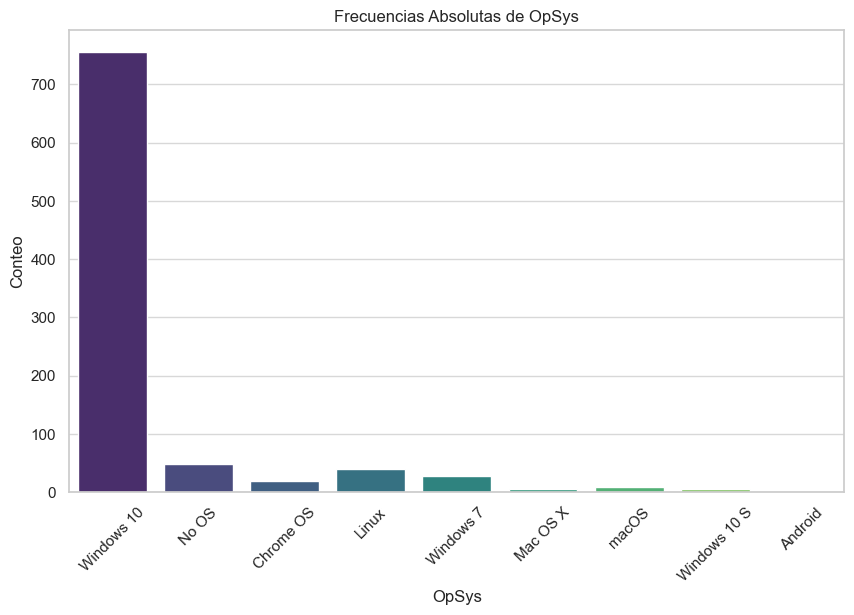

Frecuencias absolutas para Weight:
Weight
2.2kg     90
2.1kg     43
2.5kg     32
2.4kg     30
2.3kg     26
          ..
4.7kg      1
4.33kg     1
2.33kg     1
1.10kg     1
1.76kg     1
Name: count, Length: 161, dtype: int64



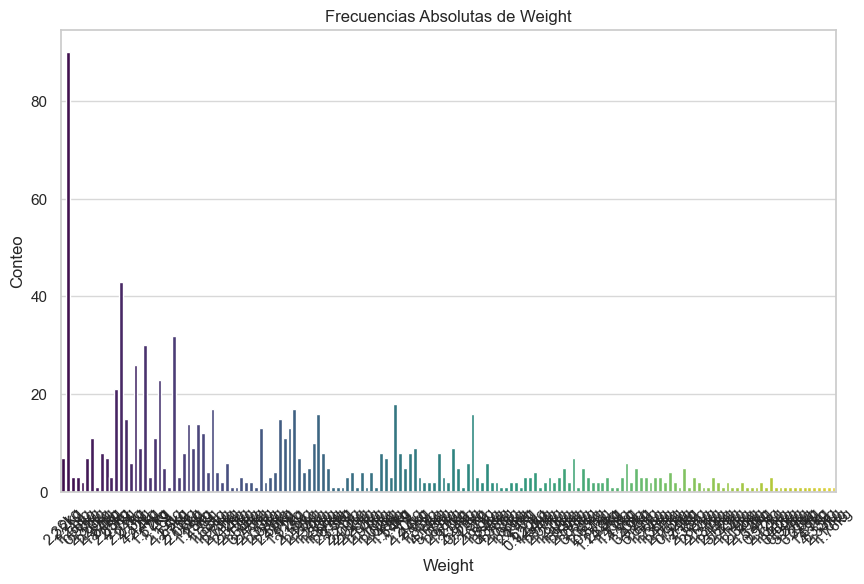

In [27]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Seleccionar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    # Calcular frecuencias absolutas
    absolute_counts = df[column].value_counts()
    
    print(f'Frecuencias absolutas para {column}:\n{absolute_counts}\n')

    # Graficar frecuencias absolutas
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Frecuencias Absolutas de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

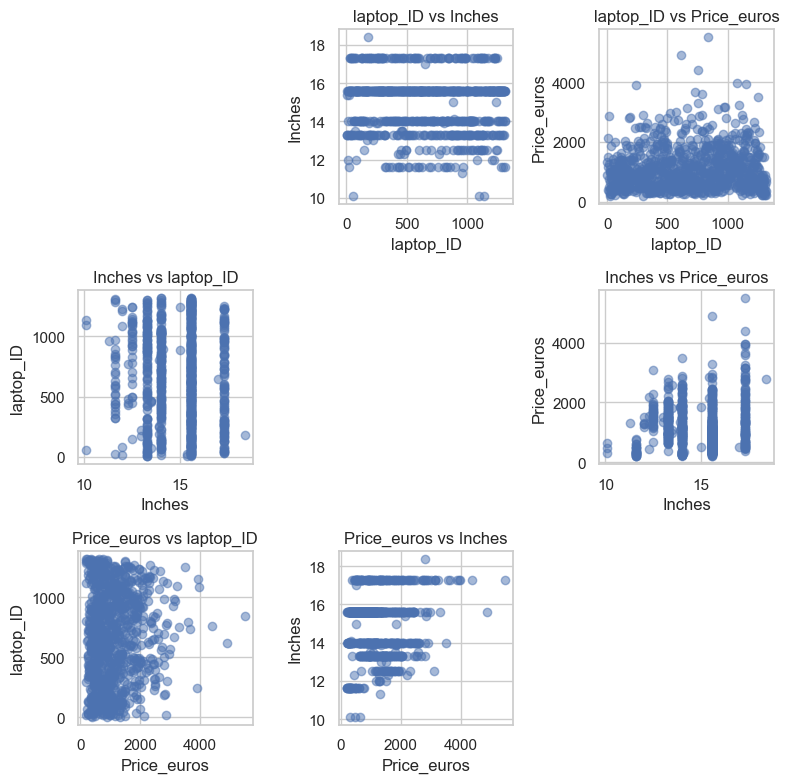

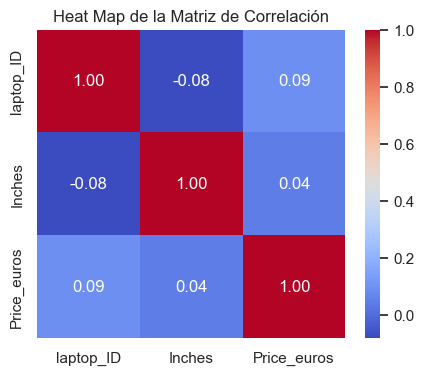

In [31]:
def graficar_relaciones(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    corr = df[num_cols].corr()

    # 2. Scatter plots
    num_plots = len(num_cols)
    fig, axes = plt.subplots(num_plots, num_plots, figsize=(8, 8))

    for i in range(num_plots):
        for j in range(num_plots):
            if i == j:
                axes[i, j].set_visible(False)  # Ocultar la diagonal
            else:
                axes[i, j].scatter(df[num_cols[i]], df[num_cols[j]], alpha=0.5)
                axes[i, j].set_xlabel(num_cols[i])
                axes[i, j].set_ylabel(num_cols[j])
                axes[i, j].set_title(f'{num_cols[i]} vs {num_cols[j]}')

    plt.tight_layout()
    plt.show()

    # 3. Heat map de la matriz de correlación (repetido como un enfoque adicional)
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Heat Map de la Matriz de Correlación')
    plt.show()

graficar_relaciones(df)